[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439  0.54256004]
 [-0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783 -0.56228753
  -1.01283112  0.31424733 -0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763   0.0675282  -1.42474819 -0.54438272  0.11092259
  -1.15099358  0.37569802 -0.60063869 -0.29169375]
 [-0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
   0.2088636  -1.95967012 -1.32818605  0.19686124]
 [ 0.73846658  0.17136828 -0.11564828 -0.3011037  -1.47852199 -0.71984421
  -0.46063877  1.05712223  0.34361829 -1.76304016]
 [ 0.32408397 -0.38508228 -0.676922    0.61167629  1.03099952  0.93128012
  -0.83921752 -0.30921238  0.33126343  0.97554513]
 [-0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
  -0.07201012  1.0035329   0.36163603 -0.64511975]
 [ 0.36139561  1.53803657 -0.03582604  1.56464366 -2.6197451   0.8219025
   0.08704707 -0.29900735  0.09176078 -1.98756891]
 

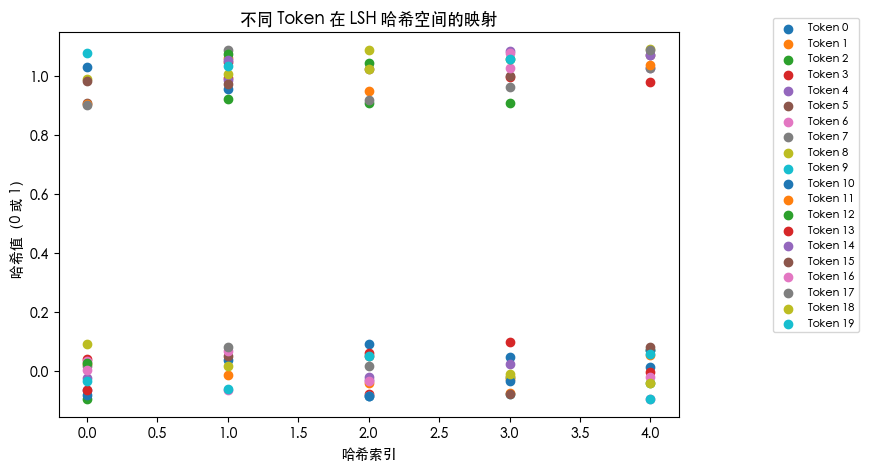

In [4]:
# 问题: 怎么判断两个token相近
# 哈希投影核心思想: 对于每个token，有一组哈希函数，每个哈希函数作用token后都会将token分到0类或1类；
# 一组哈希函数作用后就得到哈希值组(一种哈希值组相当于1类bin)，相当于给每个token新的身份；
# 判断两个token是否接近 → 两个token的哈希值组是否相同 → 属于一个bin
# 多个类别的分类可以通过迭代哈希函数实现(所以一开始只用二分类的哈希函数)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection
from collections import defaultdict
plt.rcParams['font.sans-serif'] = ['Heiti TC']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号


# 生成一些随机的 Token 向量（假设是 10 维）
np.random.seed(42)
num_tokens = 20
vector_dim = 10

tokens = np.random.randn(num_tokens, vector_dim)  # 每个 Token 是一个 10 维向量

print(tokens)

# 使用局部敏感哈希（LSH）
num_hashes = 5  # 采用 5 组随机投影
random_projector = GaussianRandomProjection(n_components=num_hashes)

# 计算 LSH 哈希值
hashed_values = random_projector.fit_transform(tokens)
hashed_buckets = (hashed_values > 0).astype(int)  # 只保留符号位（0 或 1）

# 将 Token 映射到桶（使用元组作为哈希键）
bucket_dict = defaultdict(list)
for i, hash_val in enumerate(hashed_buckets):
    bucket_key = tuple(hash_val)
    bucket_dict[bucket_key].append(i)

# 打印哈希桶的映射
print("Token 哈希桶分布：")
for bucket, token_ids in bucket_dict.items():
    print(f"桶 {bucket}: Token {token_ids}")

# 可视化不同 Token 在哈希空间的分布
plt.figure(figsize=(8, 5))
for i, token in enumerate(hashed_buckets):
    plt.scatter(range(num_hashes), token + np.random.uniform(-0.1, 0.1, size=num_hashes), label=f'Token {i}')
plt.xlabel("哈希索引")
plt.ylabel("哈希值（0 或 1）")
plt.title("不同 Token 在 LSH 哈希空间的映射")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.05), fontsize=8)
plt.show()


In [5]:
# 简洁的代码版本
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
from collections import defaultdict

# 生成 5 个随机 Token，每个 Token 是 8 维向量
np.random.seed(42)
num_tokens = 5
vector_dim = 8
tokens = np.random.randn(num_tokens, vector_dim)

# 使用 LSH 进行 4 组哈希投影
num_hashes = 4
random_projector = GaussianRandomProjection(n_components=num_hashes)

# 计算哈希值
hashed_values = random_projector.fit_transform(tokens)

# 只取符号位（0 或 1）
hashed_buckets = (hashed_values > 0).astype(int)

# 存入桶
bucket_dict = defaultdict(list)
for i, hash_val in enumerate(hashed_buckets):
    bucket_key = tuple(hash_val)  # 使用哈希值作为键
    bucket_dict[bucket_key].append(f'Token {i}')

# 输出哈希索引、哈希值和哈希桶
print("\n每个 Token 的哈希值（哈希索引列）：")
for i, token_hash in enumerate(hashed_buckets):
    print(f"Token {i}: {token_hash}")

print("\nToken 哈希桶分布：")
for bucket, token_ids in bucket_dict.items():
    print(f"桶 {bucket}: {token_ids}")



每个 Token 的哈希值（哈希索引列）：
Token 0: [1 1 0 1]
Token 1: [1 0 1 0]
Token 2: [0 0 1 0]
Token 3: [1 1 0 1]
Token 4: [1 1 1 0]

Token 哈希桶分布：
桶 (np.int64(1), np.int64(1), np.int64(0), np.int64(1)): ['Token 0', 'Token 3']
桶 (np.int64(1), np.int64(0), np.int64(1), np.int64(0)): ['Token 1']
桶 (np.int64(0), np.int64(0), np.int64(1), np.int64(0)): ['Token 2']
桶 (np.int64(1), np.int64(1), np.int64(1), np.int64(0)): ['Token 4']
